<b><font size="5">Face Detetcion and Recognition with CNN</font><br></b>

<font size="4">Introduction:</font><br><br>
<p><font size="3">With  the  development  of  deep  learning,  face  recognition  technology  based  on CNN (Convolutional Neural Network) has become the main method adopted in the field  of  face  recognition. A Convolutional Neural Network consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of convolutional layers that convolve with a multiplication. The activation function is most commonly a ReLU layer, and is subsequently followed by additional convolutions such as pooling layers, fully connected layers and normalization layers. CNN can be efficiently used in the field of Computer Vision such as image and video recognition, recommender systems and image classification.</font></p>
<p><font size="3">In this project, we are going to develope and examine the workflow of a face recognition system with CNN. The data used for this project is an open source dataset which can be downloaded from the link below:</font></p> 
<a href="https://gitlab.com/knork/data">Click here</a></font></p>
<p><font size="3">The ORL_faces.npz dataset contains 400 images of 20 different person's face which means there are 20 images belonging to every individual.</font></p> 

In [ ]:
# Import libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Load dataset
data = np.load('ORL_faces.npz') 

# Load the "Train Images"
x_train = data['trainX']
x_train = np.array(x_train, dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test, dtype='float32')/255

# Load the Label of Images
y_train = data['trainY']
y_test = data['testY']

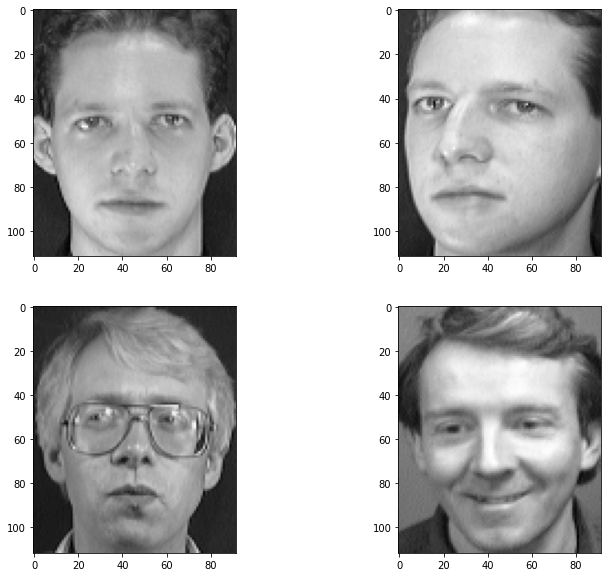

In [3]:
# Let's inspect images from 4 different persons (in grayscale)

plt.figure(figsize=(12,10))

for count, index in enumerate(range(0, 40, 10)):
    # Plot images
    plt.subplot(221+count)
    plt.imshow(x_train[index].reshape(112, 92), cmap='gray')

In [4]:
# Let's create a validation set which will be used for validation during the training process
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2,
                                                     random_state=42)

In [5]:
height = 112
width = 92
shape = (height, width, 1)

# Change shape of images
x_train = x_train.reshape(x_train.shape[0], *shape)
x_test = x_test.reshape(x_test.shape[0], *shape)
x_val = x_val.reshape(x_val.shape[0], *shape)

print('X_train shape: {}'.format(x_train.shape))
print('X_test shape: {}'.format(x_test.shape))
print('X_val shape: {}'.format(x_val.shape))
print('------------------------------------')
print('Y_train shape: {}'.format(y_train.shape))
print('Y_test shape: {}'.format(y_test.shape))
print('Y_val shape: {}'.format(y_val.shape))

X_train shape: (192, 112, 92, 1)
X_test shape: (160, 112, 92, 1)
X_val shape: (48, 112, 92, 1)
------------------------------------
Y_train shape: (192,)
Y_test shape: (160,)
Y_val shape: (48,)


In [6]:
# Create model
model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape=shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.4),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(20, activation='softmax')  
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<p><font size="3">The model has 9 distinct layers. The first one is a 2-dimensional Convolutional Layer with a Rectified Linear Unit activation function. Then, this fed into a 2-dimensional MaxPooling layer which reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation. The same process is repeated one more time. The next step is to flatten out the previous layer's output. This reshapes the tensor to have the shape that is equal to the number of elements contained in tensor, thus we'll be able to feed into fully connected Dense Layer with 'relu' activation functions. We used Dropout functions to avoid overfitting which means 40% of the nodes will be set to 0 at each update of the training phase. The last layer is our output layer with Softmax activation function for multi-class classification.</font></p>
<p><font size="3">Finally, we compile our model using Adam optimizer and Sparse Categorical Cross Entropy as a cost function. Categorical Cross Entropy loss function shall be used for multi-label classification.</font></p>

In [7]:
# Display model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2024)              49841000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2024)             

In [8]:
# Train our model monitoring validation accuracy in the meantime.
training = model.fit(x_train, y_train, batch_size=256, epochs=75, verbose=1, 
                     validation_data=(x_val, y_val))

Train on 192 samples, validate on 48 samples
Epoch 1/75
192/192 [==============================] - 35s 181ms/step - loss: 3.0070 - accuracy: 0.0521 - val_loss: 3.1105 - val_accuracy: 0.0208
Epoch 2/75
192/192 [==============================] - 30s 155ms/step - loss: 3.0982 - accuracy: 0.0417 - val_loss: 2.9902 - val_accuracy: 0.0417
Epoch 3/75
192/192 [==============================] - 29s 153ms/step - loss: 3.0093 - accuracy: 0.0625 - val_loss: 2.9788 - val_accuracy: 0.1875
Epoch 4/75
192/192 [==============================] - 28s 145ms/step - loss: 2.9633 - accuracy: 0.1042 - val_loss: 2.9722 - val_accuracy: 0.1667
Epoch 5/75
192/192 [==============================] - 31s 160ms/step - loss: 2.9554 - accuracy: 0.0677 - val_loss: 2.9592 - val_accuracy: 0.0833
Epoch 6/75
192/192 [==============================] - 28s 144ms/step - loss: 2.9254 - accuracy: 0.0938 - val_loss: 2.9445 - val_accuracy: 0.0625
Epoch 7/75
192/192 [==============================] - 28s 147ms/step - loss: 2.8550 -

Epoch 57/75
192/192 [==============================] - 29s 153ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 0.9583
Epoch 58/75
192/192 [==============================] - 28s 145ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1840 - val_accuracy: 0.9583
Epoch 59/75
192/192 [==============================] - 28s 146ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1657 - val_accuracy: 0.9583
Epoch 60/75
192/192 [==============================] - 27s 143ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1472 - val_accuracy: 0.9583
Epoch 61/75
192/192 [==============================] - 28s 146ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1281 - val_accuracy: 0.9583
Epoch 62/75
192/192 [==============================] - 28s 144ms/step - loss: 0.0147 - accuracy: 0.9948 - val_loss: 0.1051 - val_accuracy: 0.9583
Epoch 63/75
192/192 [==============================] - 29s 149ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0844 -

In [9]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test)

print('Test loss {:.4f}'.format(scores[0]))
print('Test accuaracy {:.4f}'.format(scores[1]))

160/160 [==============================] - 10s 64ms/step
Test loss 0.7522
Test accuaracy 0.8750


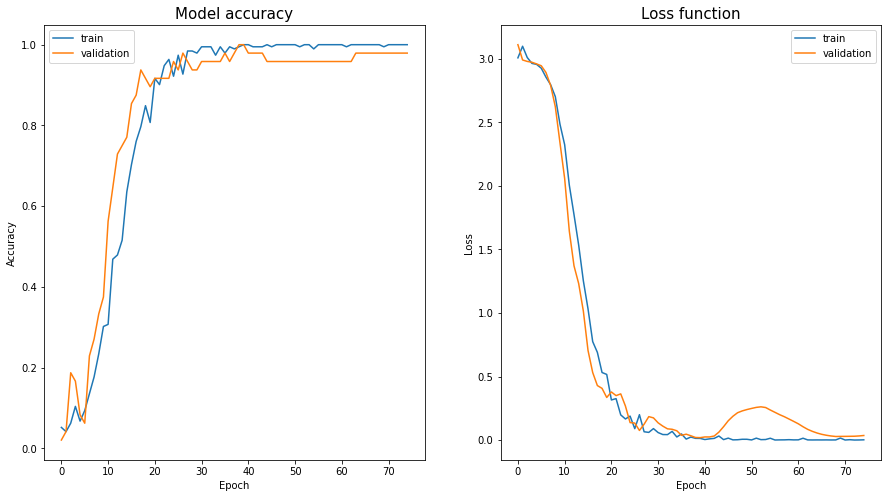

In [10]:
plt.figure(figsize=(15,8))

plt.subplot(121)
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model accuracy', size=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='best')

plt.subplot(122)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss function', size=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='best')

<p><font size="3">The accuracy graph shows that the higher the number of epachs the model was trained the more accurate the model becomes. As we can see there is no sign of overfitting since both validation and training set's accuracy has the same trend. If validation set's accuracy were lower, we'd have talked about overfitting which means the model we trained on training set too much (learned irrelevent features). On the other hand, if validation set's accuracy were higher than training set's accuracy, we'd have talked about underfitting which means the model was not trained enough.</font></p>
<p><font size="3">It seems 75 epochs was enough to train since the curves became constant 35-40 epoch.</font></p>

In [11]:
# Make predictions on testing set
prediction = model.predict_classes(x_test)
accuarcy = accuracy_score(y_test, prediction)

print("Accuracy:", accuarcy)

Accuracy: 0.875


In [12]:
print('Confusin matrix:\n', confusion_matrix(y_test, prediction))
print('')
print('Classification report:\n', classification_report(y_test, prediction))

Confusin matrix:
 [[4 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 4 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.

Text(87.0, 0.5, 'True Label')

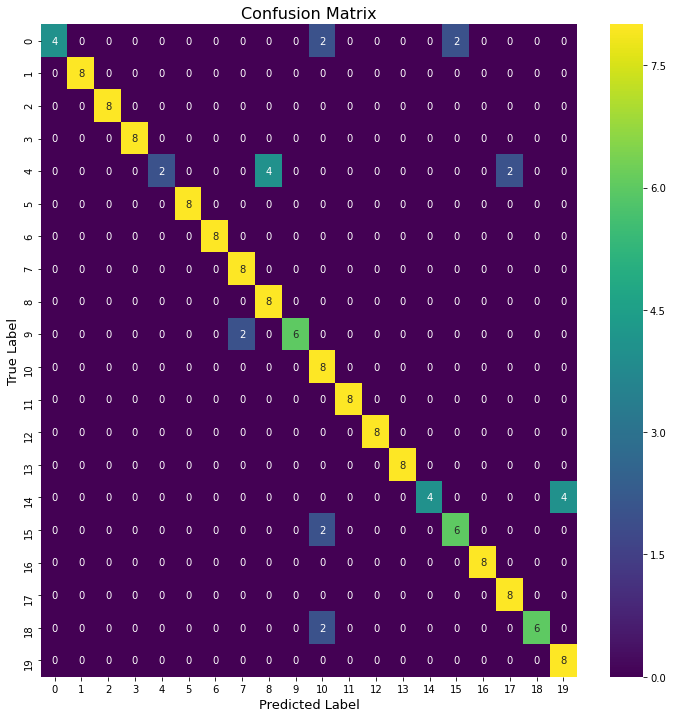

In [13]:
# Create a heatmap of the confusion matrix for a better understanding with visualization
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(12,12))
sns.heatmap(cm, cmap='viridis', annot=True)
plt.title('Confusion Matrix', size=16)
plt.xlabel('Predicted Label', size=13)
plt.ylabel('True Label', size=13)

<font size="3"><p>We can clearly see that most of the images were correctly classified (which are located diagonally represented by 8). The most frequently missclassifed person was with ID of number 4 (was correctly classified only twice). The system mixed up his face with ID number of 8. Let's have a look at them.</font></p>

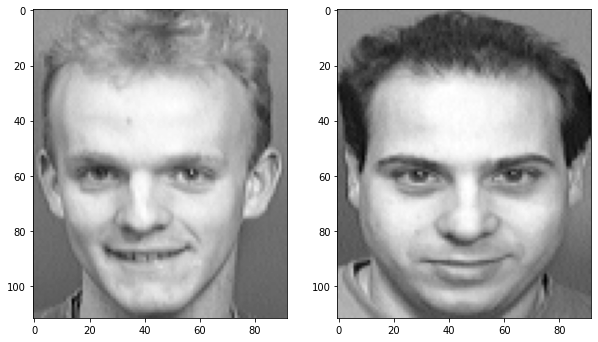

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(x_test[34].reshape(112, 92), cmap='gray')
plt.subplot(122)
plt.imshow(x_test[66].reshape(112, 92), cmap='gray')

<font size="3"><p>At first glance, no similarities can be noticed. The model probably found similarities between shape of mouths, eye-distnces, shape of noses which might could confuse the face recognition process.</font></p>

<font size="4">Conclusion:</font><br><br>
<p><font size="3">Our face recognition model using deep learning, CNN could reach a 87.5 % accuracy after training the model for 75 epochs. Even if the model's time complexity is pretty high (took roughly half an hour to run) we got a very similar, slighly lower accuracy compared what we got with the LBPH algorithm (88.75 %). Despite of the LBPH algorithm there are many parameters to tune in the developement of a CNN model such as choosing the number of layers, finding appropriate dropout ratio, specifying the batch size etc. Playing around with these parameters might leed a slighly higher accuracy ratio than we got with the LBPH algorithm.</font></p>
<p><font size="3">In overall, CNN face recognition tools are among the most robust and accurate systems available which are still under developement to this day.<font></p>